# **Primary question: **

Build a numeric predication model to predict the cvt_per_day based on the information in the dataset.


## **Secondary question: **
do data analysis on :

(a) dealt with missing values

(b) selected, transformed, or engineered new features

(c) the type of model used

(d) any particular insights on this dataset.





# **Presented By Xiyuan Liu**

In [6]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **load data**

In [2]:
drive.mount('/content/drive')
data_file_path = '/content/drive/MyDrive/Colab Notebooks/laioffer/amazon prime video/TVdata.txt'
data = pd.read_csv(data_file_path)
data.head(20)

Mounted at /content/drive


,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667
5,389496,135076.609750,1,5,mgm,2000,Comedy,13250,60000000,32095318,5.5,98.468350,37,no award,PG-13,2.750000
6,385507,134155.740199,1,6,lionsgate,2013,"Action,Adventure,Thriller",16188,11000000,8551228,5.2,94.336417,57,other award,R,2.740000
7,380517,116906.007924,1,7,lionsgate,2014,"Western,Drama",24321,16000000,2428883,6.6,123.302517,68,other award,R,3.002778
8,369857,116871.121620,2,9,lionsgate,2013,"Thriller,Crime,Western",119679,45000000,12026670,6.4,107.212833,54,other award,R,1.822222
9,393463,111565.596747,2,7,lionsgate,2009,"Action,Adventure,Sci-Fi,Fantasy,Thriller",0,0,0,0.0,94.748448,0,other award,R,2.079630


# **data exploration** - Numerical features

### **Part I: Dataset abstracted infomation and exclude erroneous data identification.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [ ]:
data.nunique()

video_id                         4226
cvt_per_day                      4226
weighted_categorical_position      37
weighted_horizontal_poition        68
import_id                           4
release_year                       97
genres                           1165
imdb_votes                       2282
budget                            253
boxoffice                         410
imdb_rating                        85
duration_in_mins                 4097
metacritic_score                   90
awards                              5
mpaa                                6
star_category                     630
dtype: int64

In [3]:
if data.isnull().values.any() == False:
  print("No missing values")
else:
  print("data contains missing values, NA")

No missing values


In [4]:
if data['video_id'].duplicated().sum()==0:
  print('no duplicated index')
else:
  print('data contains duplicated index')

no duplicated index


### **Summary: **

Dataset Overview:

The dataset contains 4226 rows and 16 columns.
Columns include numerical, categorical, and identifier types.
Each column has a non-null count indicating no missing values in the dataset.

Data Types:

float64: 4 columns (cvt_per_day, imdb_rating, duration_in_mins, star_category)
int64: 8 columns (video_id, weighted_categorical_position, weighted_horizontal_poition, release_year, imdb_votes, budget, boxoffice, metacritic_score)
object: 4 columns (import_id, genres, awards, mpaa)


### Insights:

Missing Values:


There are no missing values in the dataset. This simplifies preprocessing as no imputation or row/column removal is needed due to null values.

Feature Engineering Opportunities:

years: This column contains the year of movie which is will not effect the cvt_per_day linearly. Should do feature engineering to change it from continuouse data to discrete data.

Genres: This column contains multiple genres per video, which can be split into multiple binary columns using one-hot encoding. Also, depends on the total number of genres, some genres only shows a few times should be considered to be removed.

Awards: Awards might be a textual description that can be parsed for keywords or counted for the number of awards.

MPAA: This categorical feature can be encoded using one-hot encoding or label encoding.

### **Part II: Understand numerical features**

In [9]:
countinous_data =["weighted_categorical_position","weighted_horizontal_poition","release_year", "imdb_votes", "budget",
            "boxoffice", "imdb_rating", "duration_in_mins","metacritic_score","star_category"]
data[countinous_data].describe()

,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
25%,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
max,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


### Insights:

weighted_categorical_position: The values range from 1 to 41. The data is somewhat centered around the lower values, as indicated by the median (6) and the 75th percentile (9).

weighted_horizontal_poition: The values range from 1 to 70. The distribution is more spread out compared to weighted_categorical_position, with a mean close to the median (28).

release_year: **The range of release years is quite broad, from 1916 to 2017.** Most videos are relatively recent, as shown by the median release year of 2008.

imdb_votes: There is a significant spread in the number of IMDb votes, with some videos having none and others having up to nearly a million. The median is relatively low (535), indicating that most videos have a smaller number of votes.

budget: Many entries have a budget of 0, as indicated by the 25th and 50th percentiles. There is a large variance in budgets, with some videos having budgets in the tens of millions.

boxoffice: Similar to budget, many entries have a box office revenue of 0. The large spread indicates some videos have very high box office revenues.

imdb_rating: IMDb ratings range from 0 to 10, with a median of 5.8, indicating an average rating distribution.

duration_in_mins: The average duration is approximately 90 minutes, with most videos falling between 82.6 and 99.5 minutes.

metacritic_score: Many entries have a Metacritic score of 0, with a significant spread up to 100.

star_category: The star category ranges from 0 to 4, with a median of 1. Most entries are clustered at the lower end of the scale.


**Overall:**

budget， boxoffice， imdb_rating， metacritic_score， star_category contains massive missing data which represented by Unexplainable 0s. Should handle missing value before feeding to the model.

### **Part III: Distribution of standard categorical features**

<Axes: xlabel='cvt_per_day', ylabel='star_category'>

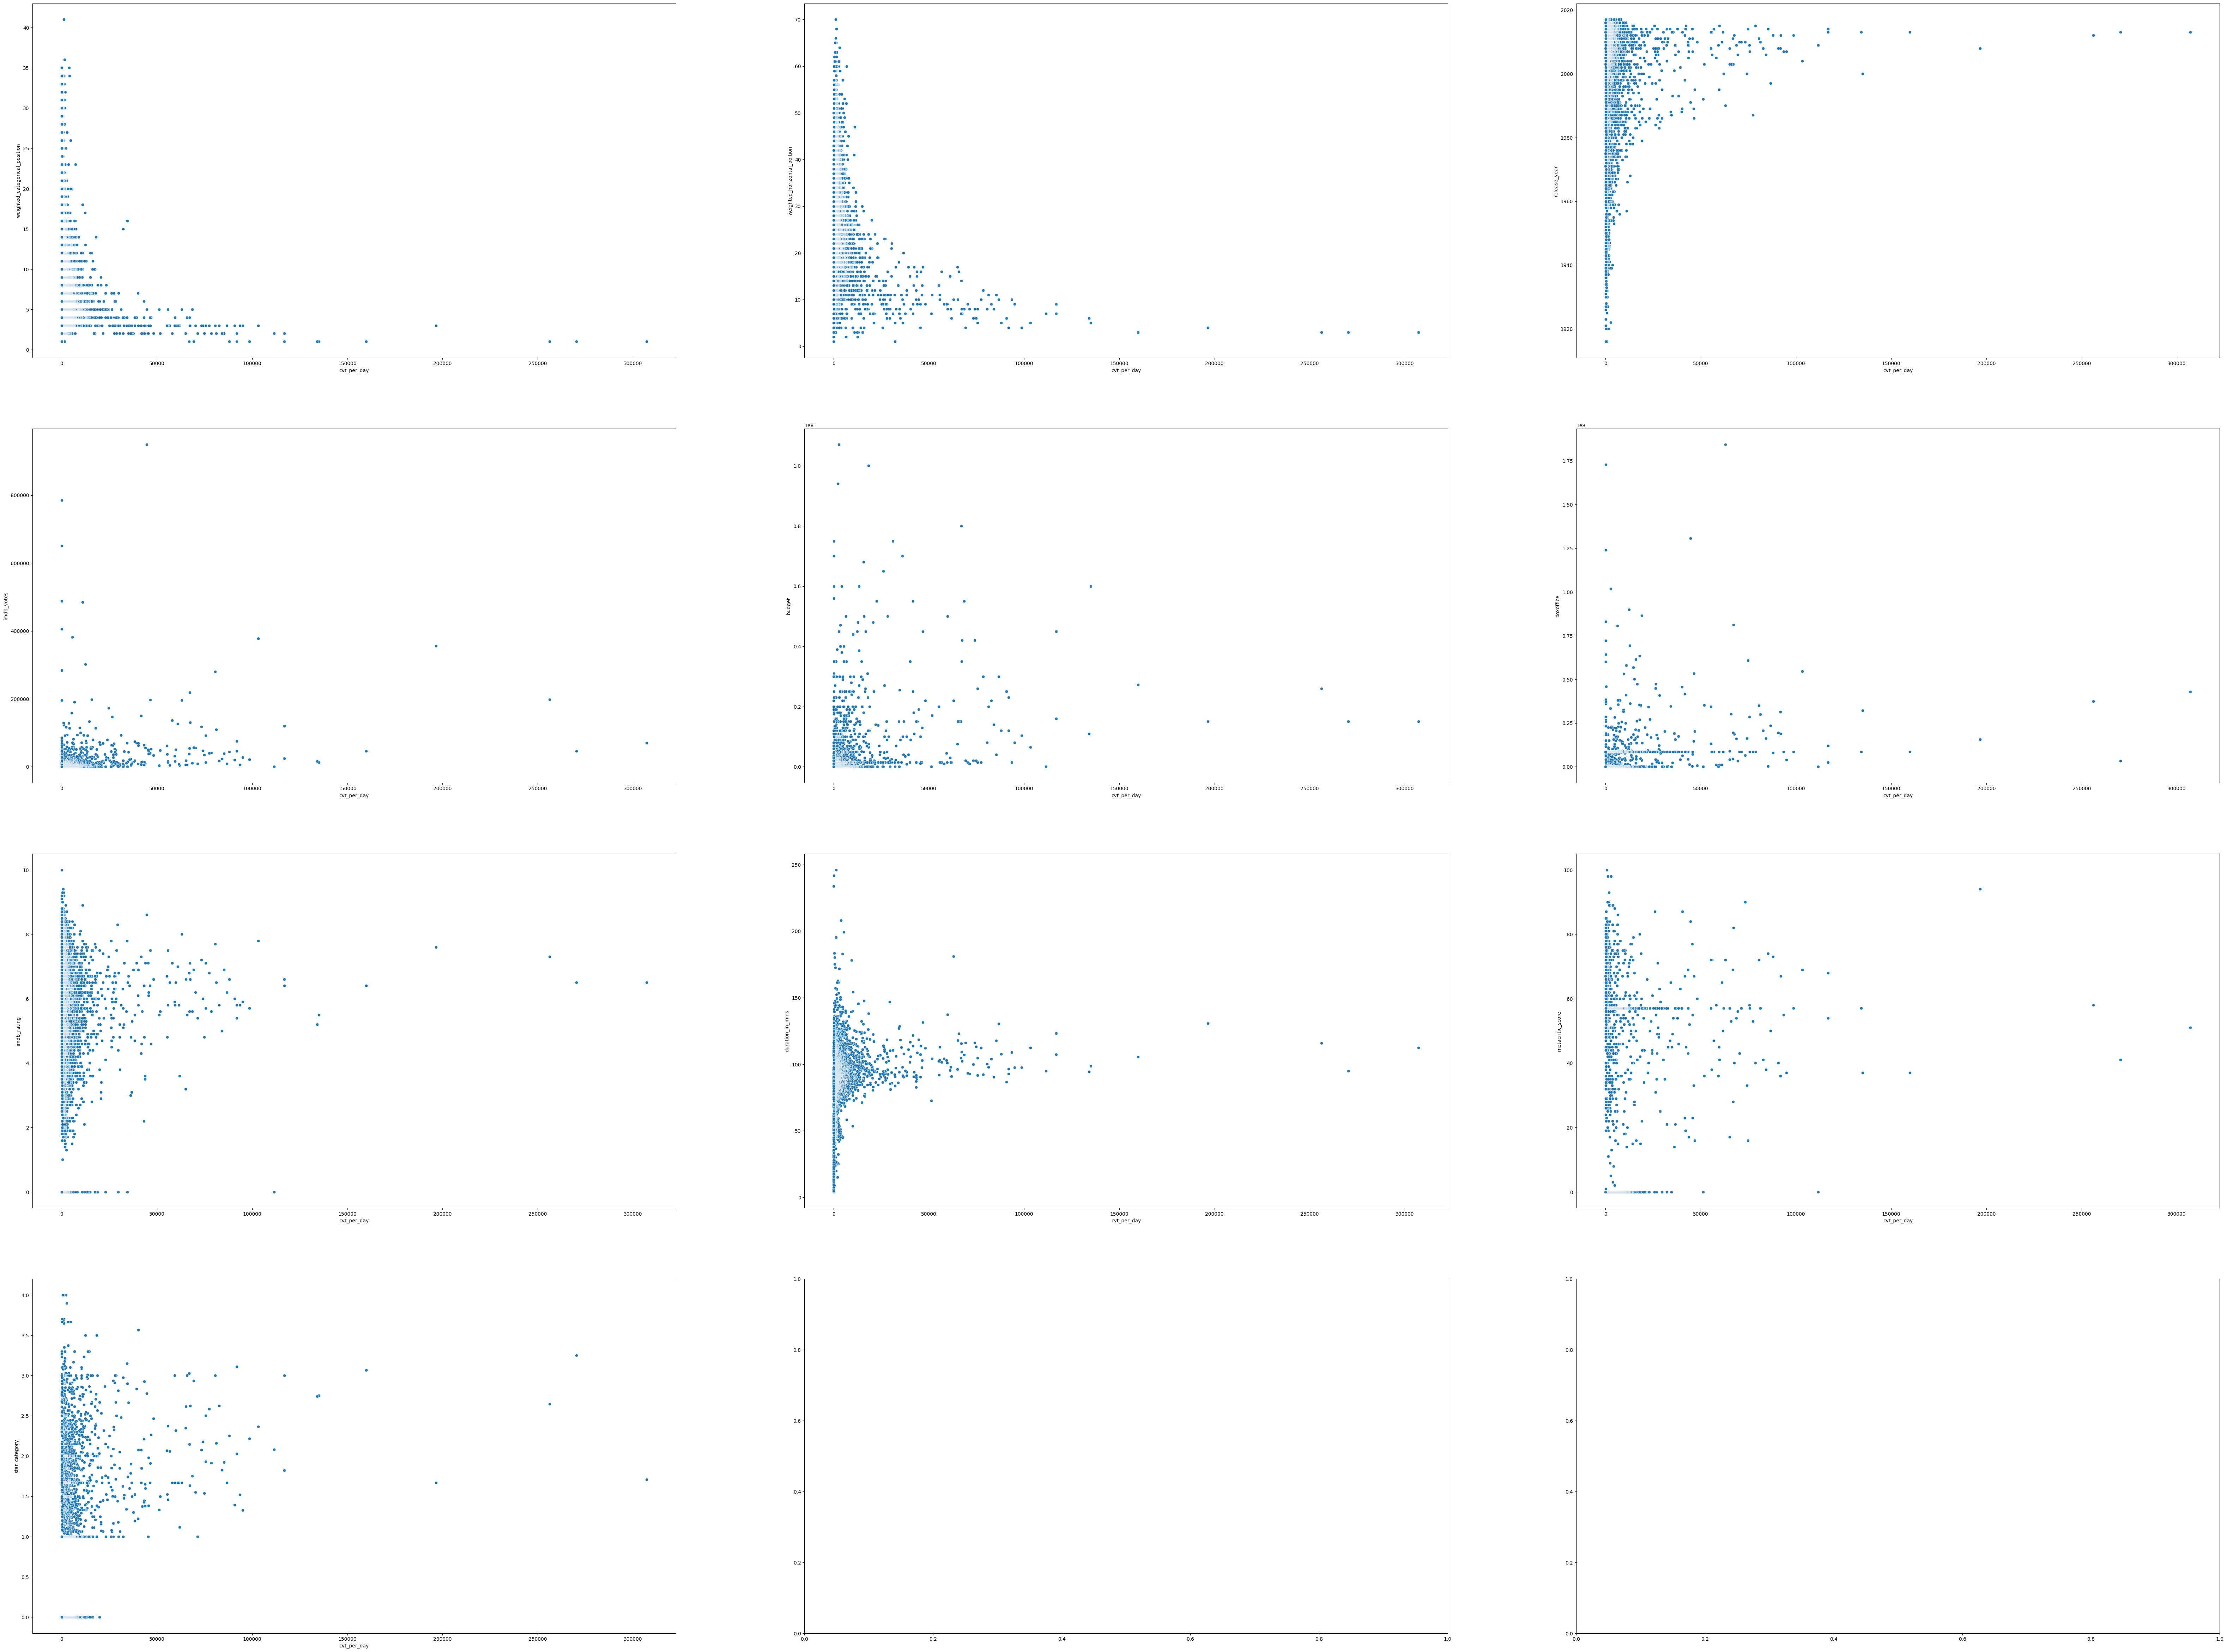

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
_,axss = plt.subplots(4,3, figsize=[80,60])
sns.scatterplot(data=data, x="cvt_per_day",y = "weighted_categorical_position", ax=axss[0,0])
sns.scatterplot(data=data, x="cvt_per_day",y = "weighted_horizontal_poition", ax=axss[0,1])
sns.scatterplot(data=data, x="cvt_per_day",y = "release_year", ax=axss[0,2])
sns.scatterplot(data=data, x="cvt_per_day",y = "imdb_votes", ax=axss[1,0])
sns.scatterplot(data=data, x="cvt_per_day",y = "budget", ax=axss[1,1])
sns.scatterplot(data=data, x="cvt_per_day",y = "boxoffice", ax=axss[1,2])
sns.scatterplot(data=data, x="cvt_per_day",y = "imdb_rating", ax=axss[2,0])
sns.scatterplot(data=data, x="cvt_per_day",y = "duration_in_mins", ax=axss[2,1])
sns.scatterplot(data=data, x="cvt_per_day",y = "metacritic_score", ax=axss[2,2])
sns.scatterplot(data=data, x="cvt_per_day",y = "star_category", ax=axss[3,0])

### **Part IV: Distribution of cvt_per_day (Y)**

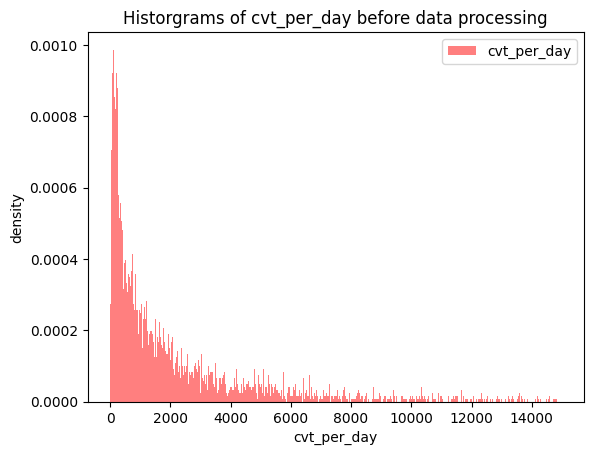

In [7]:
plt.hist(data['cvt_per_day'],bins=range(0,15000,30),color='r',label='cvt_per_day',density=True,alpha=0.5)
plt.title('Historgrams of cvt_per_day before data processing')
plt.legend(loc='upper right')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

### **Part V: Distribution of release_year**

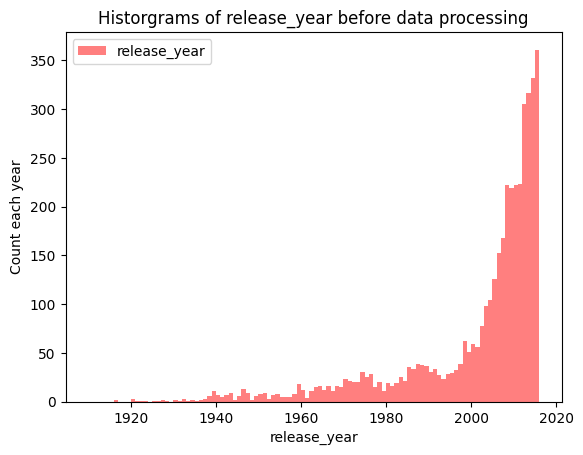

In [21]:
plt.hist(data['release_year'].values, bins = range(1910, 2017, 1), alpha = 0.5, color='r', label = 'release_year')
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('Count each year')
plt.show()

### **Part VI: Correlation among numerical features**

<Axes: >

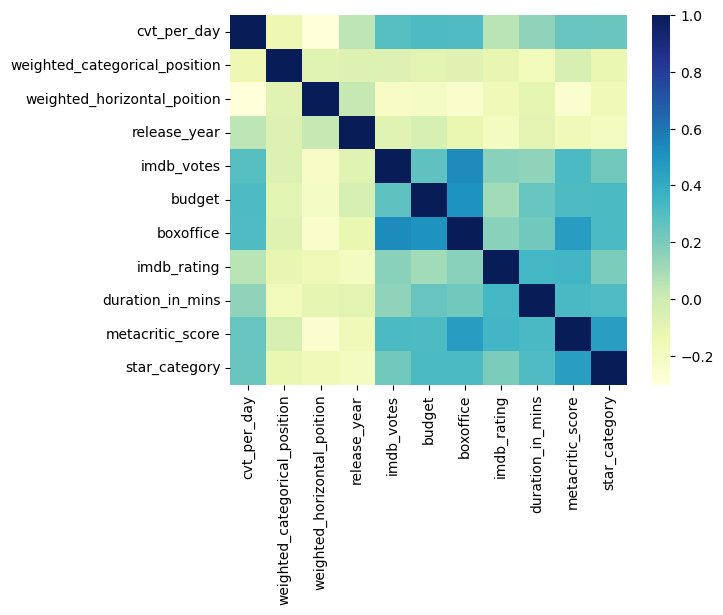

In [12]:
countinous_data_with_Y = ['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating',
               'duration_in_mins', 'metacritic_score', 'star_category']
countinous_data_corr = data[countinous_data_with_Y].corr()
sns.heatmap(countinous_data_corr, cmap="YlGnBu")

In [13]:
countinous_data_corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000000,-0.148000,-0.301663,0.045859,0.297697,0.315886,0.312209,0.058894,0.152217,0.249159,0.246956
weighted_categorical_position,-0.148000,1.000000,-0.084066,-0.068902,-0.063700,-0.089899,-0.073628,-0.116443,-0.174461,-0.044317,-0.122851
weighted_horizontal_poition,-0.301663,-0.084066,1.000000,0.026634,-0.220749,-0.211356,-0.244709,-0.162021,-0.102344,-0.255015,-0.167801
release_year,0.045859,-0.068902,0.026634,1.000000,-0.082661,-0.040121,-0.128091,-0.198856,-0.096811,-0.167038,-0.198454
imdb_votes,0.297697,-0.063700,-0.220749,-0.082661,1.000000,0.272852,0.531467,0.163264,0.155670,0.321860,0.225192
budget,0.315886,-0.089899,-0.211356,-0.040121,0.272852,1.000000,0.504618,0.105671,0.251342,0.314608,0.321721
boxoffice,0.312209,-0.073628,-0.244709,-0.128091,0.531467,0.504618,1.000000,0.163673,0.226184,0.464965,0.322329
imdb_rating,0.058894,-0.116443,-0.162021,-0.198856,0.163264,0.105671,0.163673,1.000000,0.344055,0.346935,0.191768
duration_in_mins,0.152217,-0.174461,-0.102344,-0.096811,0.155670,0.251342,0.226184,0.344055,1.000000,0.327050,0.309110
metacritic_score,0.249159,-0.044317,-0.255015,-0.167038,0.321860,0.314608,0.464965,0.346935,0.327050,1.000000,0.452445


### Insights:

### Positive Correlations with cvt_per_day:

IMDB Votes, Budget, and Box Office: These features have moderate to strong positive correlations with cvt_per_day, with correlation scores ranging from 0.4 to 0.6. This is intuitive as higher IMDb votes, larger budgets, and higher box office revenues generally indicate better video quality and popularity, which in turn can drive more conversions per day. Videos that receive more votes on IMDb or have larger production budgets are likely to be of higher quality, more appealing, and thus more effective at converting viewers.

### Negative Correlation with with cvt_per_day:

weighted_horizontal_position has the most significant negative correlation with cvt_per_day. Videos positioned lower on the page tend to receive fewer visits, which logically results in lower conversion rates. This finding underscores the importance of video placement in driving engagement and conversions. Ensuring that videos are placed in more prominent positions can significantly enhance their visibility and effectiveness in generating conversions.

# **data exploration** - categorical features

### **Part I: Distribution of standard categorical features**

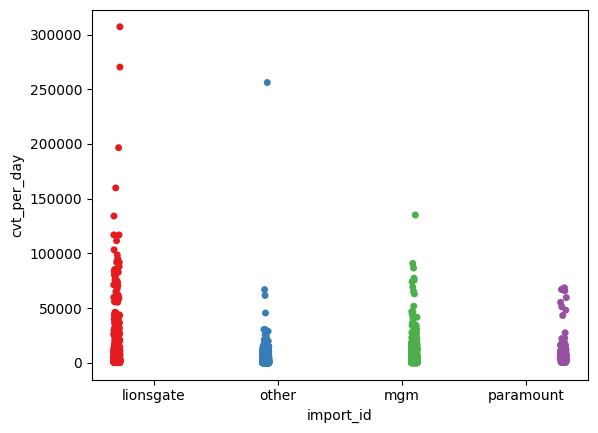

import_id
other        2963
lionsgate     677
mgm           445
paramount     141
Name: count, dtype: int64


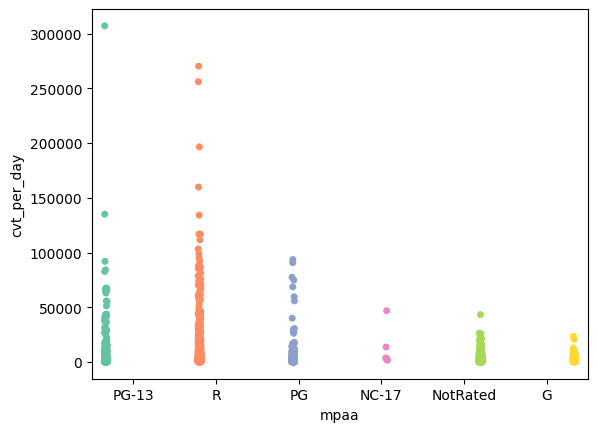

mpaa
NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: count, dtype: int64


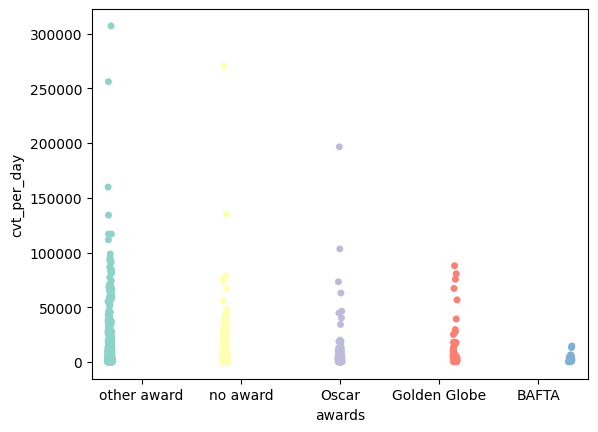

awards
no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: count, dtype: int64


In [15]:
sns.stripplot(x='import_id', y='cvt_per_day', data=data,jitter=True, hue='import_id', palette='Set1', dodge=True)
plt.show()
print(data['import_id'].value_counts())
sns.stripplot(x='mpaa', y='cvt_per_day', data=data,jitter=True, hue='mpaa', palette='Set2', dodge=True)
plt.show()
print(data['mpaa'].value_counts())
sns.stripplot(x='awards', y='cvt_per_day', data=data, jitter=True, hue='awards', palette='Set3', dodge=True)
plt.show()
print(data['awards'].value_counts())

### Part II: Distribution of splited genres

In [19]:
gen_split = data['genres'].str.get_dummies(sep=',').sum()
print(gen_split.sort_values(ascending=True))

Holiday                     1
LGBT                        2
Adult                       3
Lifestyle                   7
Reality                     9
Anime                      11
Foreign/International      64
Musicals                   68
Sport                      77
Western                   102
War                       102
Animation                 129
Music                     171
Fantasy                   243
Kids & Family             280
Sci-Fi                    363
Adventure                 363
Mystery                   375
Independent               393
Crime                     437
Romance                   591
Documentary               671
Action                    739
Horror                    762
Thriller                  879
Comedy                   1184
Drama                    1677
dtype: int64


<Axes: >

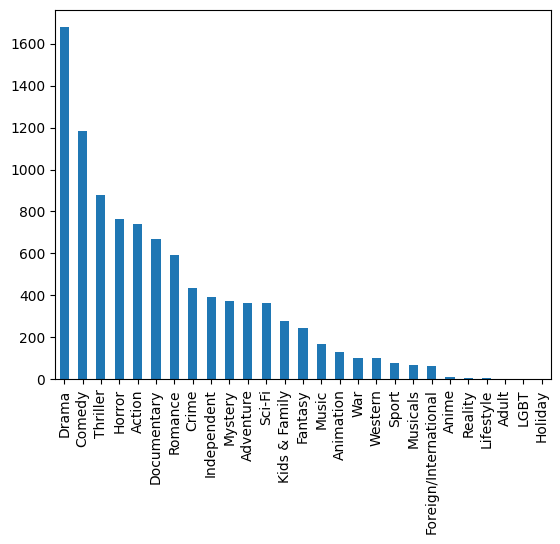

In [20]:
gen_split.sort_values(ascending=False).plot.bar()

### Insights:

Given the distribution of genres in the dataset, it is reasonable to consider removing categories with very few entries. These categories may not provide enough data to be statistically significant or representative in our analysis. Specifically, the following genres have notably low counts:

Holiday: 1

LGBT: 2

Adult: 3

Lifestyle: 7

Reality: 9

Anime: 11

# **Feature Preprocessing**

In [35]:
data_preprocessed = data.copy()

In [36]:
def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

In [37]:
# Do onehot encoding to the standard categorical features: import_id,awards,mpaa
categories = ['import_id','awards','mpaa']
enc_ohe = OneHotEncoder()
enc_ohe.fit(data_preprocessed[categories])
data_preprocessed = OneHotEncoding(data_preprocessed, enc_ohe, categories)

In [38]:
# convert genres into dummy variables
genres_split = data_preprocessed['genres'].str.get_dummies(sep=',')
genres_split['Misc_genres']=genres_split['Holiday']|genres_split['LGBT']|genres_split['Adult']|genres_split['Lifestyle']|genres_split['Reality']|genres_split['Anime']
data_preprocessed = pd.concat([data_preprocessed, genres_split], axis=1)
data_preprocessed = data_preprocessed.drop(['genres','Holiday','LGBT','Adult','Lifestyle','Reality','Anime'], axis=1)

In [39]:
# Transfer release_years from continuous data into discrete data
bins = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1910s','1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
data_preprocessed['decade'] = pd.cut(data_preprocessed['release_year'], bins=bins, labels=labels, right=False)

In [40]:
# Do onehot encoding to decade
categories_decade = ['decade']
enc_ohe = OneHotEncoder()
enc_ohe.fit(data_preprocessed[categories_decade])
data_preprocessed = OneHotEncoding(data_preprocessed, enc_ohe, categories_decade)
data_preprocessed = data_preprocessed.drop(['release_year'], axis=1)

In [41]:
data_preprocessed.head(5)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,decade_1910s,decade_1920s,decade_1930s,decade_1940s,decade_1950s,decade_1960s,decade_1970s,decade_1980s,decade_1990s,decade_2000s,decade_2010s
0,385504,307127.605608,1,3,69614,15000000,42930462,6.5,112.301017,51,1.710000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,300175,270338.426375,1,3,46705,15000000,3301046,6.5,94.983250,41,3.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,361899,256165.867446,1,3,197596,26000000,37397291,7.3,115.763675,58,2.646667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,308314,196622.720996,3,4,356339,15000000,15700000,7.6,130.703583,94,1.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,307201,159841.652064,1,3,46720,27220000,8551228,6.4,105.545533,37,3.066667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### **Missing data: **

In [42]:
data_preprocessed[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = data_preprocessed[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     3882 non-null   float64
 5   budget                         1772 non-null   float64
 6   boxoffice                      1032 non-null   float64
 7   imdb_rating                    3882 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               1214 non-null   float64
 10  star_category                  2380 non-null   float64
 11  import_id_lionsgate            4226 non-null   float64
 12  import_id_mgm                  4226 non-null   f

In [43]:
#Filling missing data with mean value
data_preprocessed['boxoffice']=data_preprocessed['boxoffice'].fillna(data_preprocessed['boxoffice'].mean())
data_preprocessed['metacritic_score']=data_preprocessed['metacritic_score'].fillna(data_preprocessed['metacritic_score'].mean())
data_preprocessed['star_category']=data_preprocessed['star_category'].fillna(data_preprocessed['star_category'].mean())
data_preprocessed['imdb_votes']=data_preprocessed['imdb_votes'].fillna(data_preprocessed['imdb_votes'].mean())
data_preprocessed['imdb_rating']=data_preprocessed['imdb_rating'].fillna(data_preprocessed['imdb_rating'].mean())
data_preprocessed['budget']=data_preprocessed['budget'].fillna(data_preprocessed['budget'].mean())
print(data_preprocessed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     4226 non-null   float64
 5   budget                         4226 non-null   float64
 6   boxoffice                      4226 non-null   float64
 7   imdb_rating                    4226 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               4226 non-null   float64
 10  star_category                  4226 non-null   float64
 11  import_id_lionsgate            4226 non-null   float64
 12  import_id_mgm                  4226 non-null   f

### **Feature scaling**

In [44]:
# MinMaxScaler()
# Do normalization for continuous data
scaler = StandardScaler()
num_cols = ['weighted_categorical_position','weighted_horizontal_poition', 'imdb_votes', 'budget',
        'boxoffice', 'imdb_rating', 'duration_in_mins','metacritic_score','star_category']
scaler.fit(data_preprocessed[num_cols])
data_preprocessed[num_cols] = scaler.transform(data_preprocessed[num_cols])

In [45]:
data_preprocessed.head(5)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,decade_1910s,decade_1920s,decade_1930s,decade_1940s,decade_1950s,decade_1960s,decade_1970s,decade_1980s,decade_1990s,decade_2000s,decade_2010s
0,385504,307127.605608,-1.105826,-2.116264,1.984496,1.470049,4.695913,0.541892,1.078791,-0.629733,0.032892,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,300175,270338.426375,-1.105826,-2.116264,1.258002,1.470049,-1.022340,0.541892,0.257409,-1.997101,3.434028,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,361899,256165.867446,-1.105826,-2.116264,6.043083,3.108277,3.897514,1.099791,1.243025,0.327425,2.101548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,308314,196622.720996,-0.779746,-2.031963,11.077168,1.470049,0.766744,1.309003,1.951625,5.249951,-0.062811,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,307201,159841.652064,-1.105826,-2.116264,1.258478,3.289972,-0.264775,0.472155,0.758378,-2.544049,3.029131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Model training**

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [49]:
# split data
train, test = train_test_split(data_preprocessed, test_size=0.15, random_state = 3)
model_train_x = train.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test_x = test.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train_y = train['cvt_per_day']
model_test_y = test['cvt_per_day']

In [50]:
print("Size of data:")
print(f"Training feature set dimensions: {model_train_x.shape}")
print(f"Testing feature set dimensions: {model_test_x.shape}")
print(f"Training target set dimensions: {model_train_y.shape}")
print(f"Testing target set dimensions: {model_test_y.shape}")

Size of data:
Training feature set dimensions: (3592, 57)
Testing feature set dimensions: (634, 57)
Training target set dimensions: (3592,)
Testing target set dimensions: (634,)


### Model 1: Linear regression

In [71]:
liear_reg = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
}

grid_search = GridSearchCV(estimator=liear_reg, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(model_train_x, model_train_y)
print(f"Best parameters (Linear regression): {grid_search.best_params_}")
print(f"Best cross-validation MSE (Linear regression): {-grid_search.best_score_}")

Best parameters (Linear regression): {'fit_intercept': False}
Best cross-validation MSE (Linear regression): 3.662025032470436e+27


In [72]:
linear_reg_model = grid_search.best_estimator_
reg_predictions = linear_reg_model.predict(model_test_x)

In [73]:
reg_test_mse = mean_squared_error(model_test_y, reg_predictions)
reg_test_r2 = r2_score(model_test_y, reg_predictions)
print(f"Test set - MSE: {reg_test_mse}, R2: {reg_test_r2}")

Test set - MSE: 236945311.65436652, R2: 0.10711559598456155


### Model 2: Lasso regression

In [75]:
las = Lasso()
param_grid = {
    'alpha': [0.1, 1.0, 10, 50, 100, 200, 500],  # Regularization strength
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000]  # Maximum number of iterations
}
grid_search = GridSearchCV(estimator=las, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(model_train_x, model_train_y)
print(f"Best parameters(Lasso regression): {grid_search.best_params_}")
print(f"Best cross-validation MSE (Lasso regression): {-grid_search.best_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.853e+10, tolerance: 5.214e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.811e+10, tolerance: 5.024e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.521e+10, tolerance: 4.928e

Best parameters(Lasso regression): {'alpha': 50, 'fit_intercept': True, 'max_iter': 1000}
Best cross-validation MSE (Lasso regression): 112216186.61515498


In [76]:
las_model = grid_search.best_estimator_
las_predictions = las_model.predict(model_test_x)

In [77]:
las_test_mse = mean_squared_error(model_test_y, las_predictions)
las_test_r2 = r2_score(model_test_y, las_predictions)
print(f"Test set - MSE: {las_test_mse}, R2: {las_test_r2}")

Test set - MSE: 237408078.2981803, R2: 0.10537174582743059


### Model #: Ridge regression

In [79]:
Rid = Ridge()
param_grid = {
    'alpha': [0.1, 1.0, 10, 50, 100, 200, 500],  # Regularization strength
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000]  # Maximum number of iterations
}
grid_search = GridSearchCV(estimator=Rid, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(model_train_x, model_train_y)
print(f"Best parameters(Ridge regression): {grid_search.best_params_}")
print(f"Best cross-validation MSE (Ridge regression): {-grid_search.best_score_}")

Best parameters(Ridge regression): {'alpha': 200, 'fit_intercept': True, 'max_iter': 1000}
Best cross-validation MSE (Ridge regression): 111448224.75893155


In [80]:
Rid_model = grid_search.best_estimator_
Rid_predictions = Rid_model.predict(model_test_x)

In [81]:
Rid_test_mse = mean_squared_error(model_test_y, Rid_predictions)
Rid_test_r2 = r2_score(model_test_y, Rid_predictions)
print(f"Test set - MSE: {Rid_test_mse}, R2: {Rid_test_r2}")

Test set - MSE: 235033180.622099, R2: 0.11432110667909712


### Model 4: Random forest

In [90]:
Ran = RandomForestRegressor(random_state=123)
param_grid = {
    'n_estimators': [1,20,40,60,80], # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None,2,6,10,14],  # Maximum depth of the trees
    'min_samples_split': [2, 3],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
grid_search = GridSearchCV(estimator=Ran, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(model_train_x, model_train_y)
print(f"Best parameters(Random forest): {grid_search.best_params_}")
print(f"Best cross-validation MSE (Random forest): {-grid_search.best_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best parameters(Random forest): {'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20}
Best cross-validation MSE (Random forest): 64279295.82612021


In [91]:
Ran_model = grid_search.best_estimator_
Ran_predictions = Ran_model.predict(model_test_x)

In [92]:
Ran_test_mse = mean_squared_error(model_test_y, Ran_predictions)
Ran_test_r2 = r2_score(model_test_y, Ran_predictions)
print(f"Test set - MSE: {Ran_test_mse}, R2: {Ran_test_r2}")

Test set - MSE: 88546028.41444984, R2: 0.666330735743371


## **Model comparison**

In [93]:
model_lst = ['linear_regression','Lasso', 'Ridge', 'Random forest']
MSE_lst = [reg_test_mse, las_test_mse, Rid_test_mse, Ran_test_mse]
R2_lst = [reg_test_r2, las_test_r2, Rid_test_r2, Ran_test_r2]

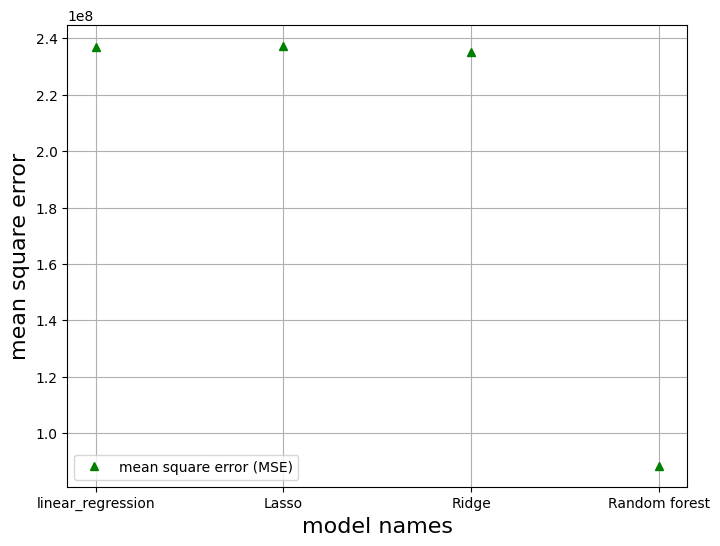

In [99]:
plt.figure(figsize=(8, 6))
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

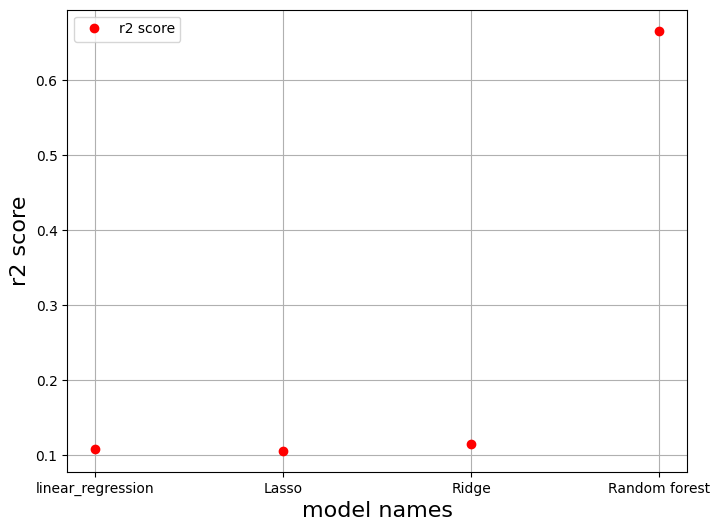

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(model_lst, R2_lst, 'ro')
plt.legend(['r2 score'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('r2 score', fontsize =16)
plt.grid(True)
plt.show()

### **Summary: **

According to MSE and r2 square, the Random Forest Regression has the best performance.

# **Feature importance**

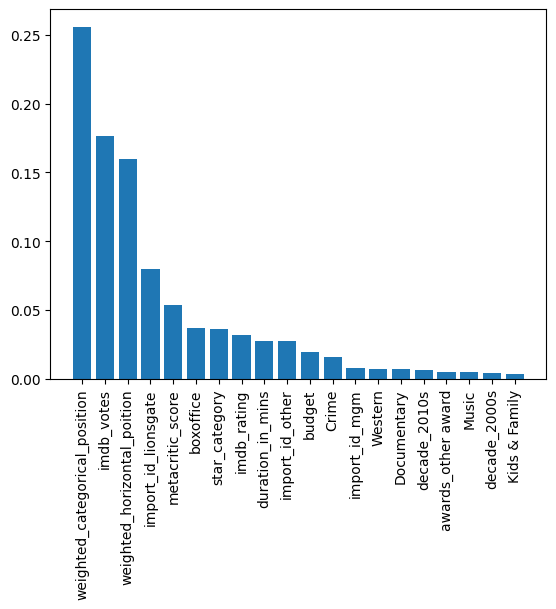

In [102]:
importances = Ran_model.feature_importances_
feature_name = model_train_x.columns.values
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()

In [103]:
importances

array([2.55979289e-01, 1.59874057e-01, 1.76354768e-01, 1.94148586e-02,
       3.67354046e-02, 3.20953711e-02, 2.71920626e-02, 5.33259228e-02,
       3.62739957e-02, 7.98030117e-02, 8.05758723e-03, 2.71611992e-02,
       1.07718814e-03, 2.63477759e-05, 1.33694333e-03, 2.39575193e-04,
       1.93679127e-03, 4.68431084e-03, 1.17137912e-04, 8.53439244e-05,
       1.05491118e-03, 1.94891848e-03, 1.92310563e-03, 1.65635167e-03,
       1.56340162e-03, 8.94549099e-04, 5.46329786e-04, 2.51111265e-03,
       1.60832328e-02, 6.67962494e-03, 1.44615294e-03, 2.29409401e-03,
       4.26188907e-05, 2.07776687e-03, 9.04134906e-05, 3.17024423e-03,
       4.66979450e-03, 6.91240303e-04, 2.45144979e-03, 8.37270769e-04,
       9.74424152e-04, 1.75486595e-03, 2.53605369e-03, 2.33005594e-04,
       6.83135076e-03, 3.20929534e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.46639137e-06, 1.85931020e-05, 1.24381219e-04,
       2.75437691e-04, 1.50019688e-03, 1.24000284e-03, 3.99201303e-03,
      

In [104]:
feature_name

array(['weighted_categorical_position', 'weighted_horizontal_poition',
       'imdb_votes', 'budget', 'boxoffice', 'imdb_rating',
       'duration_in_mins', 'metacritic_score', 'star_category',
       'import_id_lionsgate', 'import_id_mgm', 'import_id_other',
       'import_id_paramount', 'awards_BAFTA', 'awards_Golden Globe',
       'awards_Oscar', 'awards_no award', 'awards_other award', 'mpaa_G',
       'mpaa_NC-17', 'mpaa_NotRated', 'mpaa_PG', 'mpaa_PG-13', 'mpaa_R',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Foreign/International',
       'Horror', 'Independent', 'Kids & Family', 'Music', 'Musicals',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Misc_genres', 'decade_1910s', 'decade_1920s',
       'decade_1930s', 'decade_1940s', 'decade_1950s', 'decade_1960s',
       'decade_1970s', 'decade_1980s', 'decade_1990s', 'decade_2000s',
       'decade_2010s'], dtype=object)

### **Insights: **

1. The position where a video is placed appears to be the most critical factor influencing cvt_per_day, as indicated by the high importance of weighted_categorical_position and weighted_horizontal_position in the model. Videos placed prominently in these positions are more likely to capture user attention and engagement, potentially leading to higher view counts. This finding aligns with the behavior where viewers tend to focus on videos displayed prominently, such as those in the front row. If a video meets their initial expectations or interests, viewers may not need to scroll down to explore other options.

2. Features such as IMDb votes, ratings, budget, and awards suggest that high-quality and recognized content tends to attract more viewers. This tendency also has been shown in the correlation table which shows correlation between IMDb votes, ratings, budget, and awards with cvt_per_day indicates that viewers are drawn to content that is perceived as high-quality or recognized. One plausible explanation is that viewers either actively seek out specific content or rely on effective recommendation systems. High IMDb ratings and awards may signal credibility and quality, influencing viewer choices and increasing engagement with the content.

# Recommendations for improvement in sales

Optimize Video Placement Strategy:

Recommendation: Focus on placing high-potential videos prominently in weighted_categorical_position and weighted_horizontal_position to maximize visibility and engagement. Consider A/B testing different placements to identify optimal positions that drive higher cvt_per_day.

Implementation: Use data-driven insights to strategically position videos on your platform. Highlighting popular or trending content in prime locations can capture initial viewer attention and potentially reduce the need for extensive scrolling.



Invest in Content Quality and Recognition:

Recommendation: Allocate resources towards creating high-quality content that aligns with viewer preferences and expectations. Emphasize factors such as IMDb ratings, awards, and production values to enhance perceived quality.

Implementation: Develop a content strategy that prioritizes quality over quantity. Invest in talented creators, compelling narratives, and production values that resonate with your target audience. Leverage awards and accolades to bolster credibility and attract a broader viewer base.

Enhance Recommendation Systems:

Recommendation: Continuously refine and optimize recommendation algorithms to effectively match viewers with content that aligns with their preferences and interests.

Implementation: Incorporate machine learning techniques to analyze viewer behavior, preferences, and feedback. Use personalized recommendations to surface relevant content, improving user satisfaction and engagement.

Monitor and Adapt to Viewer Behavior:

Recommendation: Regularly analyze viewer engagement metrics and adapt strategies based on emerging trends and viewer feedback.

Implementation: Utilize analytics tools to track cvt_per_day, viewer retention rates, and user interactions. Adjust content promotion and placement strategies based on real-time data insights to maintain or increase viewership.

Collaborate with Influencers and Partners:

Recommendation: Collaborate with influencers, industry partners, or production studios to co-create or promote high-profile content.

Implementation: Form strategic partnerships to leverage existing fan bases, expand reach, and enhance content visibility. Joint marketing efforts can amplify promotional reach and attract new viewerships.

## **Further question: **

What if a really good movie (high in IMDb votes, ratings, budget) placed in the bottom of the page? Which feature will be more dominat?  